This notebook makes an evaluation of VGG16 Neural Networks for automatic classification of common maternal fetal ultrasound planes

Work done by : Habbouza Hamdi, Mouzaki Youness, Zarrouq Soukaina

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#download data to google drive
!wget https://zenodo.org/record/3904280/files/FETAL_PLANES_ZENODO.zip?download=1 /content/drive/MyDrive/DeepL
!mkdir data
!unzip FETAL_PLANES_ZENODO.zip?download=1 -d /content/drive/MyDrive/DeepL/data

In [12]:
#imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
#read excel file that contains labels
df = pd.read_excel("/content/drive/MyDrive/DL/data/FETAL_PLANES_DB_data.xlsx")

In [24]:
#define columns names
df = df.rename(columns={'Image_name': 'Image', 'Plane': 'label'})
df['Image'] = df['Image'].apply(lambda x: x.replace(x, '/content/drive/MyDrive/DL/data/Images/'+x+'.png'))

In [25]:
#split data to train and test data
df_train = df[df['Train ']==1][['Image', 'label']]
df_test = df[df['Train ']==0][['Image', 'label']]

In [26]:
#show train data shape
df_train.shape

(7129, 2)

In [28]:
print('training data is {0:.2f}% of the dataset.'.format(7129/(7129+5271)*100))

training data is 57.49% of the dataset.


In [29]:
#define training data generator
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255,)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col="Image",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

Found 7129 validated image filenames belonging to 6 classes.


In [30]:
#define test data generator
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="Image",
    y_col="label",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)

Found 5271 validated image filenames belonging to 6 classes.


In [31]:
#define VGG model
model = Sequential()
vgg= tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None,
    classes=6,
)

58900480/58889256 [==============================] - 1s 0us/step


In [32]:
#woring with initial weights
for layer in vgg.layers:
        layer.trainable=False
model.add(vgg)
model.add(GlobalAveragePooling2D())

In [33]:
#adding top layer
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 14,847,558
Trainable params: 132,870
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
#compile model and save history
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    validation_data=test_generator,
                    epochs=10)

Epoch 1/10
223/223 [==============================] - 170s 741ms/step - loss: 0.8348 - accuracy: 0.7042 - val_loss: 0.6736 - val_accuracy: 0.7564
Epoch 2/10
223/223 [==============================] - 157s 703ms/step - loss: 0.4733 - accuracy: 0.8320 - val_loss: 0.4991 - val_accuracy: 0.8353
Epoch 3/10
223/223 [==============================] - 157s 702ms/step - loss: 0.3977 - accuracy: 0.8593 - val_loss: 0.5171 - val_accuracy: 0.8063
Epoch 4/10
223/223 [==============================] - 156s 698ms/step - loss: 0.3499 - accuracy: 0.8750 - val_loss: 0.4146 - val_accuracy: 0.8607
Epoch 5/10
223/223 [==============================] - 156s 702ms/step - loss: 0.3202 - accuracy: 0.8843 - val_loss: 0.4150 - val_accuracy: 0.8505
Epoch 6/10
223/223 [==============================] - 156s 702ms/step - loss: 0.3071 - accuracy: 0.8897 - val_loss: 0.3764 - val_accuracy: 0.8670
Epoch 7/10
223/223 [==============================] - 156s 701ms/step - loss: 0.2922 - accuracy: 0.8954 - val_loss: 0.4247 -

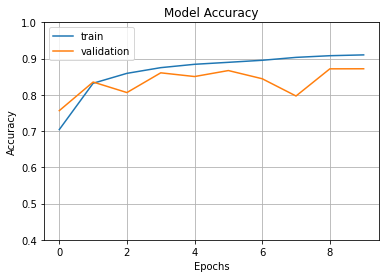

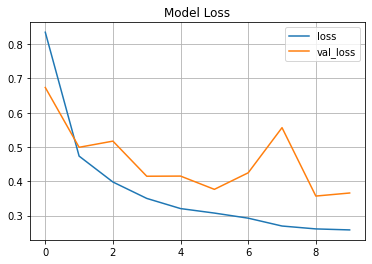

In [36]:
#plot history
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)

plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.grid()
plt.title('Model Loss')
plt.legend()

In [ ]:
#Conclusion :
Using the VGG16 model and transfer learning and after training the model 
for 10 epoches we got an accuracy of 0.9102 on the training set,
a validation loss of 0.3657 and a validation accuracy of 0.8719 which is better that our other experimentation with DenseNet169 architectures